In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction, \
    combine_p_and_s_predictions

# Load data

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
feature_dir = 'selected_features_constHP'
s_results_df = pd.read_csv(os.path.join(datadir, 's_models', feature_dir, 'all.stat.results.csv'))
p_results_df = pd.read_csv(os.path.join(datadir, 'p_models', feature_dir, 'all.stat.results.csv'))
p_df_2023 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.20230101.csv'))
s_df_2023 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.20230101.csv'))



In [3]:
all_p_stats = p_results_df['station']
p_pred_path = os.path.join(datadir,'p_models', feature_dir)
p_train_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'train')
p_test_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'test')
p_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.745854,YHB
1,60001352,2.250510,2.051306,YHB
2,60001367,2.155231,2.064458,YHB
3,60001392,2.076413,1.429495,YHB
4,60001397,2.273901,2.054309,YHB
...,...,...,...,...
588,60456897,2.121661,2.361038,YDD
589,60456907,3.098341,3.198689,YDD
590,60470442,1.697778,1.462730,YDD
591,60513762,1.051296,0.868705,YDD


In [4]:
p_holdout_preds_df = combine_prediction_files(p_df_2023['station'].unique(), p_pred_path,'P', 'holdout')
p_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.169807,YHH
1,60529052,1.338398,1.049498,YHH
2,60529182,2.608960,2.289284,YHH
3,60529562,0.843194,0.737601,YHH
4,60529752,1.289612,1.283531,YHH
...,...,...,...,...
14,60554577,1.558406,1.837201,FLWY
15,60556087,1.402305,1.234699,FLWY
16,60556132,1.403297,1.871400,FLWY
17,60556617,1.858090,1.679217,FLWY


In [5]:
all_s_stats = s_results_df['station']
s_pred_path = os.path.join(datadir,'s_models', feature_dir)
s_train_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'train')
s_test_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'test')
s_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.736525,YHB
1,60001367,2.155231,2.054870,YHB
2,60001437,2.543478,2.464974,YHB
3,60001517,2.080642,2.161423,YHB
4,60001572,1.630087,1.707947,YHB
...,...,...,...,...
239,60516997,0.857505,1.144656,YDD
240,60518152,0.756163,0.976055,YDD
241,60519152,1.920408,1.820101,YDD
242,60521912,0.755231,1.019222,YDD


In [ ]:
s_holdout_preds_df = combine_prediction_files(s_df_2023['station'].unique(), s_pred_path,'S', 'holdout')
s_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.244881,YMC
1,60529052,1.338398,1.136641,YMC
2,60529562,0.843194,0.690048,YMC
3,60529752,1.289612,1.172708,YMC
4,60529762,0.986834,1.064607,YMC
...,...,...,...,...
7,60553712,1.861026,1.889634,FLWY
8,60553732,2.405604,2.367266,FLWY
9,60554092,1.788850,1.968501,FLWY
10,60554577,1.558406,1.714286,FLWY


# Average the predictions - P & S separately

In [7]:
p_test_avg_df = compute_network_avg_prediction(p_test_preds_df)
p_holdout_avg_df = compute_network_avg_prediction(p_holdout_preds_df)

In [8]:
s_test_avg_df = compute_network_avg_prediction(s_test_preds_df)
s_holdout_avg_df = compute_network_avg_prediction(s_holdout_preds_df)

# Average P and S together

In [9]:
combined_test_df = combine_p_and_s_predictions(p_test_preds_df, s_test_preds_df)
combined_test_avg_df = compute_network_avg_prediction(combined_test_df)

Original number of predictions: 19858
Filtered number of predictions: 17859


In [10]:
combined_holdout_df = combine_p_and_s_predictions(p_holdout_preds_df, s_holdout_preds_df)
combined_holdout_avg_df = compute_network_avg_prediction(combined_holdout_df)

Original number of predictions: 7046
Filtered number of predictions: 6250


# Put them all together

### P (all), S (all), P & S (events with P and S picks)

In [11]:
plotting.set_default_fontsizes()

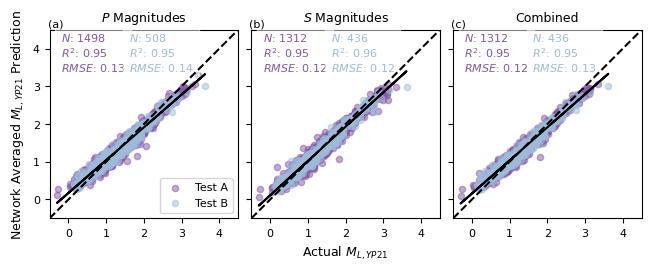

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(6.4, 2.7), constrained_layout=True)
titles = ['$\it P$ Magnitudes', '$\it S $ Magnitudes', 'Combined']
lin_reg_color = "k"
plotting.actual_v_network_avg_prediction([p_test_avg_df, p_holdout_avg_df],
                                    ax=axes[0],
                                    title=titles[0],
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test A', 'Test B'],
                                    plot_legend=True,
                                    marker_colors=['#8856a7', '#9ebcda'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=True,
                                    text_x = [-0.2, 0.60],
                                    text_y=[-1.1, -1.1],
                                    legend_loc='lower right',
                                    plot_lin_reg=True,
                                    lin_reg_color=lin_reg_color)

plotting.actual_v_network_avg_prediction([s_test_avg_df, s_holdout_avg_df],
                                    ax=axes[1],
                                    title=titles[1],
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test A', 'Test B'],
                                    plot_legend=False,
                                    marker_colors=['#8856a7', '#9ebcda'],
                                    plot_ylabel=False,
                                    plot_ytick_labels=False,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=True,
                                    text_x = [-0.2, 0.60],
                                    text_y=[-1.1, -1.1],
                                    plot_lin_reg=True,
                                    lin_reg_color=lin_reg_color)

plotting.actual_v_network_avg_prediction([combined_test_avg_df, combined_holdout_avg_df],
                                         ax=axes[2],
                                    title=titles[2],
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test A', 'Test B'],
                                    plot_legend=False,
                                    marker_colors=['#8856a7', '#9ebcda'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                     plot_xlabel=False,
                                    plot_ytick_labels=False,
                                    text_x = [-0.2, 0.60],
                                    text_y=[-1.1, -1.1],
                                    plot_lin_reg=True,
                                    lin_reg_color=lin_reg_color)
sp_labels = ['(a)', '(b)', '(c)']
titles_x = [0.3, 0.3, 0.35]
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.015, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=8)
    # ax.yaxis.set_label_position("right")
    # ax.set_ylabel(titles[i], rotation=-90, labelpad=10.0)
#     ax.text(titles_x[i], 
#             0.075, 
#             titles[i], 
#             transform=ax.transAxes,
#             fontsize=9,
#             bbox={'edgecolor':'k', 'facecolor':'w', 'pad':2.0, "linewidth":0.5})
    
axes[0].set_ylabel('Network Averaged $M_{L,YP21}$ Prediction', fontsize=9)
axes[1].set_xlabel('Actual $M_{L,YP21}$', fontsize=9)
fig.savefig('../figures/actualVPredictedAveragesTitlesHorizontalLinReg.png', dpi=300)